# kmeans

参数与返回值 详解   
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html   
调参详解  
https://www.cnblogs.com/pinard/p/6169370.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(suppress=True)

In [2]:
np.random.seed(112)
X = np.random.uniform(0, 1, size=(2000, 2))

In [3]:
X.shape

(2000, 2)

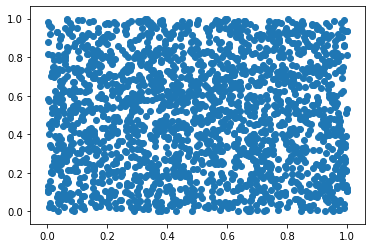

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## 2类

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(X)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print("质心",km.cluster_centers_)
print("各点距各质心距离之和",km.inertia_)
print("每个点的所属的簇label",km.labels_)
print("迭代次数",km.n_iter_)

质心 [[0.74949234 0.50221994]
 [0.25211542 0.4917601 ]]
各点距各质心距离之和 205.43825739008088
每个点的所属的簇label [1 0 0 ... 1 0 1]
迭代次数 7


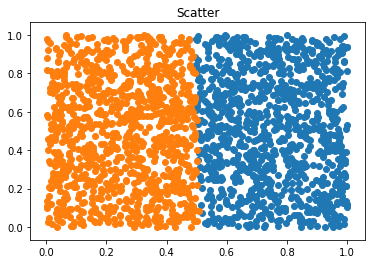

In [7]:
df = pd.DataFrame(X)
df["l"]=km.labels_
df_r=df[df["l"]==1]
df_f=df[df["l"]==0]
p0 = plt.scatter(df_f[0].values, df_f[1].values)
p1 = plt.scatter(df_r[0].values, df_r[1].values)

plt.title('Scatter')
plt.show()

## 10类

In [8]:
km = KMeans(n_clusters=10)
km.fit(X)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
print("质心",km.cluster_centers_)
print("各点距各质心距离之和",km.inertia_)
print("每个点的所属的簇label",km.labels_)
print("迭代次数",km.n_iter_)

质心 [[0.6039069  0.35522836]
 [0.16729723 0.48493429]
 [0.51226579 0.88238045]
 [0.12936084 0.17246946]
 [0.16838457 0.81190208]
 [0.83099118 0.13688552]
 [0.86037309 0.48763648]
 [0.83142213 0.82437808]
 [0.4739855  0.60303909]
 [0.42494202 0.13737758]]
各点距各质心距离之和 33.80091766519906
每个点的所属的簇label [8 5 7 ... 8 9 8]
迭代次数 15


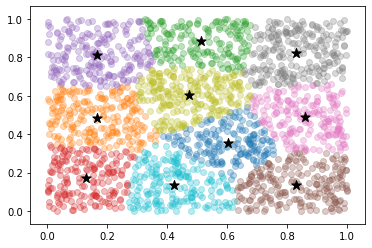

In [10]:
df["l"]=km.labels_
for _,g in df.groupby("l"):
    p0 = plt.scatter(g[0].values, g[1].values,alpha=0.3)
for v in km.cluster_centers_:
    p1 = plt.scatter(v[0], v[1],s=100,color="black",marker="*")
plt.show()